In [ ]:
#Davian, Abosede, Oun, and Maryana's team

In [39]:
#Load Library DPLYR
library(dplyr)
library(ggplot2)
library(tidyr)
require(reshape2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: reshape2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [15]:
defaultW <- getOption("warn")
options(warn = -1)

In [16]:
#Load Stock Data 
#CHANGE PATH TO YOUR OWN FOR GITHUB PURPOSES

#Retrieve Close & Adj Columns from program
IBM = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/IBM.csv")[, c("Close", "Adj.Close")]
MSFT = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/MSFT.csv") [, c("Close", "Adj.Close")]
GOOG = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/GOOG.csv") [, c("Close", "Adj.Close")]
AAPL= read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/AAPL.csv")  [, c("Close", "Adj.Close")]
AMZN = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/AMZN.csv") [, c("Close", "Adj.Close")]
FB = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/FB.csv")     [, c("Close", "Adj.Close")]
NFLX = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/NFLX.csv")[, c("Close", "Adj.Close")]
TSLA = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/TSLA.csv")[, c("Close", "Adj.Close")]
ORCL = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/ORCL.csv")[, c("Close", "Adj.Close")]
SAP = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/SAP.csv")[, c("Close", "Adj.Close")]
#Date ??
Date = read.csv("/Users/davianbrown/Documents/GitHub/CS636_MidtermProject/IBM.csv")[, c("Date")]


ERROR: Error in file(file, "rt"): cannot open the connection


In [21]:
#Load Stock Data Maryana 

IBM = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/IBM.csv")[, c("Close", "Adj.Close")]
MSFT = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/MSFT.csv")[, c("Close", "Adj.Close")]
GOOG = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/GOOG.csv")[, c("Close", "Adj.Close")]
AAPL = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/AAPL.csv")[, c("Close", "Adj.Close")]
AMZN = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/AMZN.csv")[, c("Close", "Adj.Close")]
FB = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/FB.csv")[, c("Close", "Adj.Close")]
NFLX= read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/NFLX.csv")[, c("Close", "Adj.Close")]
TSLA = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/TSLA.csv")[, c("Close", "Adj.Close")]
ORCL = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/ORCL.csv")[, c("Close", "Adj.Close")]
SAP = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/SAP.csv")[, c("Close", "Adj.Close")]

Date = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/IBM.csv")[, c("Date")]


In [22]:
#Rename Columns to have name function
#Rename IBM
names(IBM) = c("IBM.Close","IBM.Adj.Close")
#Rename Amazon
names(AMZN) = c("AMZN.Close","AMZN.Adj.Close")
#Rename Microsoft
names(MSFT) = c("MSFT.Close","MSFT.Adj.Close")
#Rename Google
names(GOOG) = c("GOOG.Close","GOOG.Adj.Close")
#Rename Apple
names(AAPL) = c("AAPL.Close","AAPL.Adj.Close")
#Rename Facebook
names(FB) = c("FB.Close","FB.Adj.Close")
#Rename Netflix
names(NFLX) = c("NFLX.Close","NFLX.Adj.Close")
#Rename Tesla
names(TSLA) = c("TSLA.Close","TSLA.Adj.Close")
#Rename Oracle
names(ORCL) = c("ORCL.Close","ORCL.Adj.Close")
#Rename SAP
names(SAP) = c("SAP.Close","SAP.Adj.Close")


<h2> <b> Retrieve the "Close" and "Adj Close" values for each stock </b> <h2>
    You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.


In [23]:
#Add all Stocks to Dataframe
market = as.data.frame(cbind(Date, IBM, AMZN,MSFT,GOOG,AAPL, FB, NFLX, TSLA,ORCL, SAP))

In [24]:
head(market)

Date,IBM.Close,IBM.Adj.Close,AMZN.Close,AMZN.Adj.Close,MSFT.Close,MSFT.Adj.Close,GOOG.Close,GOOG.Adj.Close,AAPL.Close,...,FB.Close,FB.Adj.Close,NFLX.Close,NFLX.Adj.Close,TSLA.Close,TSLA.Adj.Close,ORCL.Close,ORCL.Adj.Close,SAP.Close,SAP.Adj.Close
2018-01-02,154.25,129.0939,1189.01,1189.01,85.95,81.84829,1065.00,1065.00,43.0650,...,181.42,181.42,201.07,201.07,64.106,64.106,46.63,43.82148,112.39,105.9143
2018-01-03,158.49,132.6424,1204.20,1204.20,86.35,82.22920,1082.48,1082.48,43.0575,...,184.67,184.67,205.05,205.05,63.450,63.450,47.71,44.83644,113.31,106.7813
2018-01-04,161.70,135.3289,1209.59,1209.59,87.11,82.95293,1086.40,1086.40,43.2575,...,184.33,184.33,205.63,205.63,62.924,62.924,48.18,45.27813,115.05,108.4210
2018-01-05,162.49,135.9901,1229.14,1229.14,88.19,83.98138,1102.23,1102.23,43.7500,...,186.85,186.85,209.99,209.99,63.316,63.316,48.47,45.55065,116.33,109.6273
2018-01-08,163.47,136.8102,1246.87,1246.87,88.28,84.06710,1106.94,1106.94,43.5875,...,188.28,188.28,212.05,212.05,67.282,67.282,48.98,46.02994,114.80,108.1854
2018-01-09,163.83,137.1115,1252.70,1252.70,88.22,84.00996,1106.26,1106.26,43.5825,...,187.87,187.87,209.31,209.31,66.738,66.738,49.06,46.28467,114.16,107.5823


<h2> <b> You start to manage 5 million dollars fund on Jan 02, 2018 </b> </h2>
<br></br>
    You have a strategy to manage the fund.

In [25]:
#Function to get the Trading Day stock value
#Editing Here
ValueofStock = function(stock, day){
    stock = paste(stock ,  sep="", ".Close") 
    result = market[[stock]][day]
    return(result)
}

In [26]:
#Function to Calculate MTM

mtm = function(today, cash, stocks, shares){
    
    result = 0
    
    StockLength = length(stocks)
    
    for (y in 1: StockLength){
        
        value = stockValue(stocks[y], today) * as.numeric(shares[y])
        
        result = result + value
    }
    
    result = result + cash
    
    return(result)
}



In [33]:
# This Function enables traders to purchase Stocks.

purchase_stocks = function(df) { #buyStocks
    
    result = data.frame(stock=df[["stock"]], amt = 0, remainder = 0)
    
    stock = paste(result[["stock"]] ,  sep="", ".Close")
    
    day = df[["day"]]
    
    Stock_Price = market[[stock]][day]
    
    StockQuantity = df[["cash"]] %/% Stock_Price
    
    StockQuantity = result$amt 
    
    cashLeft = df[["cash"]] - (StockQuantity * Stock_Price)
    
    cashLeft = result$remainder 
    
    return(result)
    
}


In [28]:
# function to find which stock dropped most 

droppedStock = function(today, interval){
    stockdata = market
    stockdata = select(stockdata,ends_with("Adj.Close"))
    droppedmost = stockdata %>% slice(today-interval,today) %>%
    mutate(IBM = (IBM.Adj.Close - lag(IBM.Adj.Close))/lag(IBM.Adj.Close) * 100) %>%
    mutate(AMZN = (AMZN.Adj.Close - lag(AMZN.Adj.Close))/lag(AMZN.Adj.Close) * 100) %>%
    mutate(AAPL = (AAPL.Adj.Close - lag(AAPL.Adj.Close))/lag(AAPL.Adj.Close) * 100) %>%
    mutate(FB = (FB.Adj.Close - lag(FB.Adj.Close))/lag(FB.Adj.Close) * 100) %>%
    mutate(GOOG = (GOOG.Adj.Close - lag(GOOG.Adj.Close))/lag(GOOG.Adj.Close) * 100) %>%
    mutate(MSFT = (MSFT.Adj.Close - lag(MSFT.Adj.Close))/lag(MSFT.Adj.Close) * 100) %>%
    mutate(NFLX = (NFLX.Adj.Close - lag(NFLX.Adj.Close))/lag(NFLX.Adj.Close) * 100) %>%
    mutate(ORCL = (ORCL.Adj.Close - lag(ORCL.Adj.Close))/lag(ORCL.Adj.Close) * 100) %>%
    mutate(SAP = (SAP.Adj.Close - lag(SAP.Adj.Close))/lag(SAP.Adj.Close) * 100) %>%
    mutate(TSLA = (TSLA.Adj.Close - lag(TSLA.Adj.Close))/lag(TSLA.Adj.Close) * 100) %>%
    select(-contains(".Adj.Close")) %>% slice(2)
    alldata = sort(droppedStock[1,1:10])
    columns = c(colnames(alldata))
    return(columns[1:5])
    }

In [29]:
# function to find which stock surged the most 

surgedStock = function(today, interval){
    stockdata = market
    stockdata = select(stockdata,ends_with("Adj.Close"))
    surgedStock = data %>% slice(today-interval,today) %>%
    mutate(IBM = (IBM.Adj.Close - lag(IBM.Adj.Close))/lag(IBM.Adj.Close) * 100) %>%
    mutate(AMZN = (AMZN.Adj.Close - lag(AMZN.Adj.Close))/lag(AMZN.Adj.Close) * 100) %>%
    mutate(AAPL = (AAPL.Adj.Close - lag(AAPL.Adj.Close))/lag(AAPL.Adj.Close) * 100) %>%
    mutate(FB = (FB.Adj.Close - lag(FB.Adj.Close))/lag(FB.Adj.Close) * 100) %>%
    mutate(GOOG = (GOOG.Adj.Close - lag(GOOG.Adj.Close))/lag(GOOG.Adj.Close) * 100) %>%
    mutate(MSFT = (MSFT.Adj.Close - lag(MSFT.Adj.Close))/lag(MSFT.Adj.Close) * 100) %>%
    mutate(NFLX = (NFLX.Adj.Close - lag(NFLX.Adj.Close))/lag(NFLX.Adj.Close) * 100) %>%
    mutate(ORCL = (ORCL.Adj.Close - lag(ORCL.Adj.Close))/lag(ORCL.Adj.Close) * 100) %>%
    mutate(SAP = (SAP.Adj.Close - lag(SAP.Adj.Close))/lag(SAP.Adj.Close) * 100) %>%
    mutate(TSLA = (TSLA.Adj.Close - lag(TSLA.Adj.Close))/lag(TSLA.Adj.Close) * 100) %>%
    select(-contains(".Adj.Close")) %>% slice(2)
    alldata = sort(surgedStock[1,1:10])
    columns = c(colnames(alldata))
    return(columns[6:10])
}


In [30]:
#This Function Calculates the Percent Change of Stocks 

change_of_percent = function(p,c){
    
    percent = c - p
    
    percent = percent/p
    
    result = p*100
    
    return(result)
}


In [51]:
# 5 days of buying LOW
# Run Functions and Compute

buyingStocks = data.frame(day = 12,stock = "IBM",cash = 10000)
stocks = list()
shares = list()
investment  = 5000000
dayInterval = 5
mtmprevious = 0
mtmcurrent = 0
mtm1 = list()
mtm1Val = list()

# 5 days rebalancing of buying low
for (today in 1:nrow(Date)){
    if(today %% dayInterval == 1){
        #initial day
        if(today == 1){
            stocks = list("IBM", "MSFT", "GOOG", "AAPL", "AMZN")
            splitCash = investment/5
            investment = 0
            for(x in stocks){
                buyingStocks = data.frame(day = today ,stock = x,cash = splitCash)
                stockDf = buyStocks(buyingStocks)
                investment = investment + stockDf$remainder
                shares = append(shares, stockDf$amt)
            }
}
        #rebalance
        else {
            #find the 5 stocks whose "Adj Close" prices dropped the most
            priceDropped = droppedStock(today,dayInterval)
            #sell all current holdings
            for(x in stocks){
                investment = investment + ValueofStock(x, today)
            }
            stocks = list()
            shares = list()
            #split your cash
            splitCash = investment/5
            #buy the maximum shares of stock
            stocks = priceDropped
            for(x in stocks){
                buyingStocks = data.frame(day = today ,stock = x,cash = splitCash)
                stockDf =buyStocks(buyingStocks)#buyStocks
                investment = investment + stockDf$remainder
                shares = append(shares, stockDf$amt)
            }
}
    }
    mtmprevious = mtmcurrrent
    
    #USD to JPY
    mtmcurrent = mtm(today, investment, stocks, shares)
    mtm1Val = append(mtm1Val, mtmcurrent)
    mtm1 = append(mtm1, change_of_percent(mtmprevious,mtmcurrent))
}
#total
plot((2:250),mtm1Val[-1])
#percent change
plot((2:250),mtm1[-1])
#function for high-tech index

#function to find high-tech index of stocks 

highTech = function(){
    ht = market
    htday = ht %>% select(1,3,5,7,9,11,13,15,17,19)
    return(rowMeans(htday))
}
myHighTechAvg = highTech()
myHighTechPercent = list()
for(x in 2:250){
    myHighTechPercent = append(myHighTechPercent, percentChange(x-1,x))
}
#High-Tech Stock Percentage Comparison
plot((2:250),myHighTechPercent)

ERROR: Error in 1:nrow(Date): argument of length 0


In [32]:
# 5 days of buying HIGH

buyingStocks = data.frame(day = 12,stock = "IBM",cash = 10000)
stocks = list()
shares = list()
investment  = 5000000
dayInterval = 5
mtmprevious = 0
mtmcurrent = 0
mtm1 = list()
mtm1Val = list()

# 5 days rebalancing of buying low
for (today in 1:nrow(Date)){
    if(today %% dayInterval == 1){
        
        #initial day
        if(today == 1){
            stocks = list("IBM", "MSFT", "GOOG", "AAPL", "AMZN")
            splitCash = investment/5
            investment = 0
            
            for(x in stocks){
                buyingStocks = data.frame(day = today ,stock = x,cash = splitCash)
                stockDf = buyStocks(buyingStocks)
                investment = investment + stockDf$remainider
                shares = append(shares, stockDf$amount)
            }
}
        #rebalance
        else {
            #find the 5 stocks whose "Adj Close" prices dropped the most
            priceDropped = droppedStock(today,dayInterval)
            #sell all current holdings
            for(x in stocks){
                investment = investment + stockValue(x, today)
            }
            stocks = list()
            shares = list()
            #split your cash
            splitCash = investment/5
            #buy the max shares of stock
            stocks = priceDropped
            for(x in stocks){
                buyingStocks = data.frame(day = today ,stock = x,cash = splitCash)
                stockDf =buyStocks(buyingStocks)#buyStocks
                investment = investment + stockDf$remainder
                shares = append(shares, stockDf$amount)
            }
}
    }
    mtmprevious = mtmcurrrent
    
    #USD to JPY
    mtmcurrent = mtmValue(today, investment, stocks, shares)
    mtm1Val = append(mtm1Val, mtmcurrent)
    mtm1 = append(mtm1, percentChange(mtmprevious,mtmcurrent))
}
#total
plot((2:250),mtm1Val[-1])
#percent change
plot((2:250),mtm1[-1])
#function for high-tech index

#function to find high-tech index of stocks 

highTech = function(){
    ht = market
    htday = ht %>% select(1,3,5,7,9,11,13,15,17,19)
    return(rowMeans(htday))
}
myHighTechAvg = highTech()
myHighTechPercent = list()
for(x in 2:250){
    myHighTechPercent = append(myHighTechPercent, percentChange(x-1,x))
}
#High-Tech Stock Percentage Comparison
plot((2:250),myHighTechPercent)

ERROR: Error in 1:nrow(Date): argument of length 0


TEST:

In [68]:

# function to buy stocks for given day
#  param (day,stock,cash)
purchaseStocks = function(df) {
    result = data.frame(stock=df[["stock"]], amt = 0, remainder = 0)
    stock = paste(result[["stock"]] ,sep="", ".Close")
    day = df[["day"]]
    Stockprice = market[[stock]][day]
    StockQuantity = df[["cash"]] %/% Stockprice
    result$amt = StockQuantity
    cashLeft = df[["cash"]] - (StockQuantity * Stockprice)
    result$remainder = cashLeft
    return(result)
}


# function to get Trading Day Stock Value 
ValueofStock = function(stock, day){
    stock = paste(stock , ".Close", sep="")
    Stockprice = market[[stock]][day]
    return(Stockprice)
}


#function to calculate percent change
change_of_percent = function(previous,current){
    percent = current - previous
    result = percent/previous
    return(result*100)
}


#function to calculate MTM
mtm = function(today, cash, stocks, shares){
    result = 0
    StockLength=length(stocks)
    for (x in 1:StockLength){
        value = ValueofStock(stocks[x], today) * as.numeric(shares[x])
        result = result + value
    }
    result = result + cash
    return(result)
}


#function to find surged the most
surgedStock = function(today, interval){
    data = market
    data = select(data,ends_with("Adj.Close"))
    surgedStock = data %>% slice(today-interval,today) %>%
    mutate(IBM = (IBM.Adj.Close - lag(IBM.Adj.Close))/lag(IBM.Adj.Close) * 100) %>%
    mutate(AMZN = (AMZN.Adj.Close - lag(AMZN.Adj.Close))/lag(AMZN.Adj.Close) * 100) %>%
    mutate(AAPL = (AAPL.Adj.Close - lag(AAPL.Adj.Close))/lag(AAPL.Adj.Close) * 100) %>%
    mutate(FB = (FB.Adj.Close - lag(FB.Adj.Close))/lag(FB.Adj.Close) * 100) %>%
    mutate(GOOG = (GOOG.Adj.Close - lag(GOOG.Adj.Close))/lag(GOOG.Adj.Close) * 100) %>%
    mutate(MSFT = (MSFT.Adj.Close - lag(MSFT.Adj.Close))/lag(MSFT.Adj.Close) * 100) %>%
    mutate(NFLX = (NFLX.Adj.Close - lag(NFLX.Adj.Close))/lag(NFLX.Adj.Close) * 100) %>%
    mutate(ORCL = (ORCL.Adj.Close - lag(ORCL.Adj.Close))/lag(ORCL.Adj.Close) * 100) %>%
    mutate(SAP = (SAP.Adj.Close - lag(SAP.Adj.Close))/lag(SAP.Adj.Close) * 100) %>%
    mutate(TSLA = (TSLA.Adj.Close - lag(TSLA.Adj.Close))/lag(TSLA.Adj.Close) * 100) %>%
    select(-contains(".Adj.Close")) %>% slice(2)
    allCols = sort(surgedStock[1,1:10])
    columns = c(colnames(allCols))
    return(columns[6:10])
}


#function to find dropped the most
droppedStock = function(today, interval){
    data = market
    data = select(data,ends_with("Adj.Close"))
    droppedmost = data %>% slice(today-interval,today) %>%
    mutate(IBM = (IBM.Adj.Close - lag(IBM.Adj.Close))/lag(IBM.Adj.Close) * 100) %>%
    mutate(AMZN = (AMZN.Adj.Close - lag(AMZN.Adj.Close))/lag(AMZN.Adj.Close) * 100) %>%
    mutate(AAPL = (AAPL.Adj.Close - lag(AAPL.Adj.Close))/lag(AAPL.Adj.Close) * 100) %>%
    mutate(FB = (FB.Adj.Close - lag(FB.Adj.Close))/lag(FB.Adj.Close) * 100) %>%
    mutate(GOOG = (GOOG.Adj.Close - lag(GOOG.Adj.Close))/lag(GOOG.Adj.Close) * 100) %>%
    mutate(MSFT = (MSFT.Adj.Close - lag(MSFT.Adj.Close))/lag(MSFT.Adj.Close) * 100) %>%
    mutate(NFLX = (NFLX.Adj.Close - lag(NFLX.Adj.Close))/lag(NFLX.Adj.Close) * 100) %>%
    mutate(ORCL = (ORCL.Adj.Close - lag(ORCL.Adj.Close))/lag(ORCL.Adj.Close) * 100) %>%
    mutate(SAP = (SAP.Adj.Close - lag(SAP.Adj.Close))/lag(SAP.Adj.Close) * 100) %>%
    mutate(TSLA = (TSLA.Adj.Close - lag(TSLA.Adj.Close))/lag(TSLA.Adj.Close) * 100) %>%
    select(-contains(".Adj.Close")) %>%slice(2)
    allCols = sort(droppedmost[1,1:10])
    columnss = c(colnames(allCols))
    return(columns[1:5])
}


#function to calculate percent change
percentChange = function(prev,curr){
    p = curr - prev
    p = p/prev
    return(p*100)
}
# initialize variables
buyStocksDf = data.frame(day = 12,stock = "IBM",cash = 10000)
stocks = list()
shares = list()
totalCash  = 5000000
dayInterval = 5
mtmprev = 0
mtmcurr = 0
mtm1 = list()
mtm1Val = list()
# 5 days rebalancing of buying low
for (today in 1:NROW(dates)){
    if(today %% dayInterval == 1){
        #initial day
        if(today == 1){
            stocks = list('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
            splitCash = totalCash/5
            totalCash = 0
            for(x in stocks){
                buyStocksDf = data.frame(day = today ,stock = x,cash = splitCash)
                stockDf = buyStocks(buyStocksDf)
                totalCash = totalCash + stockDf$remainingCash
                shares = append(shares, stockDf$amount)
            }
}
        #rebalance
        else {
            #find the 5 stocks whose "Adj Close" prices dropped the most
            mostDropped = droppedMost(today,dayInterval)
            #sell all current holdings
            for(x in stocks){
                totalCash = totalCash + stockValue(x, today)
            }
            stocks = list()
            shares = list()
            #split your cash
            splitCash = totalCash/5
            #buy the max shares of stock
            stocks = mostDropped
            for(x in stocks){
                buyStocksDf = data.frame(day = today ,stock = x,cash = splitCash)
                stockDf = buyStocks(buyStocksDf)
                totalCash = totalCash + stockDf$remainingCash
                shares = append(shares, stockDf$amount)
            }
}
    }
    mtmprev = mtmcurr
    #USD to JPY
    mtmcurr = mtmValue(today, totalCash, stocks, shares)
    mtm1Val = append(mtm1Val, mtmcurr)
    mtm1 = append(mtm1, percentChange(mtmprev,mtmcurr))
}
#total
plot((2:250),mtm1Val[-1])
#percent change
plot((2:250),mtm1[-1])
#function for high-tech index

highTech = function(){
    ht = universe
    htday = ht %>% select(1,3,5,7,9,11,13,15,17,19)
    return(rowMeans(htday))
}
myHighTechAvg = highTech()
myHighTechPercent = list()
for(x in 2:250){
    myHighTechPercent = append(myHighTechPercent, percentChange(x-1,x))
}
#High-Tech Stock Percentage Comparison
plot((2:250),myHighTechPercent)

ERROR: Error in NROW(dates): object 'dates' not found


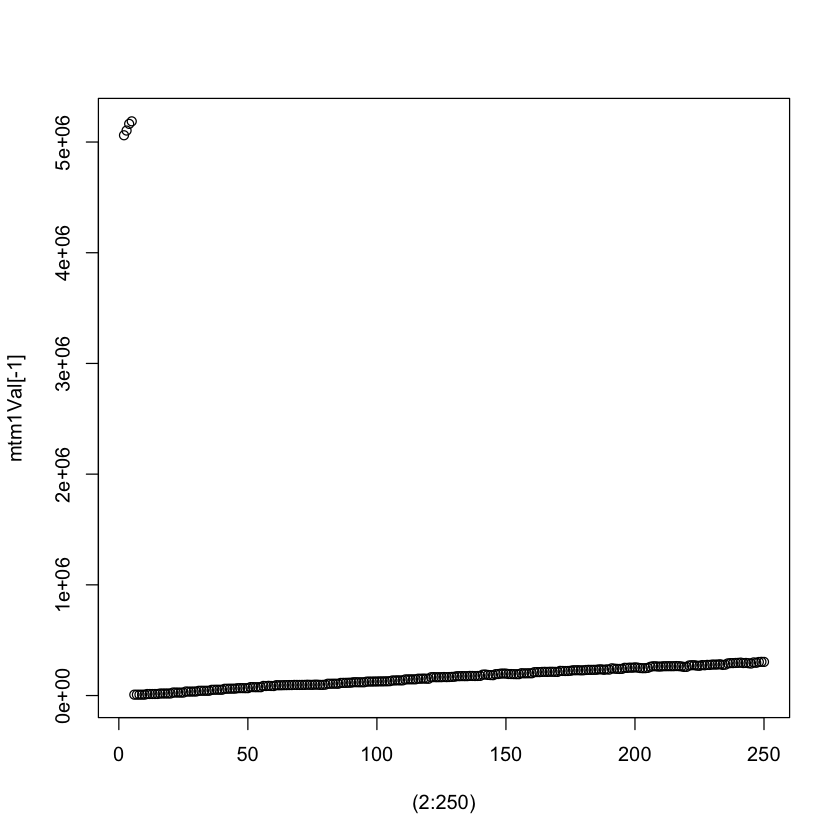

ERROR: Error in highTech(): object 'universe' not found


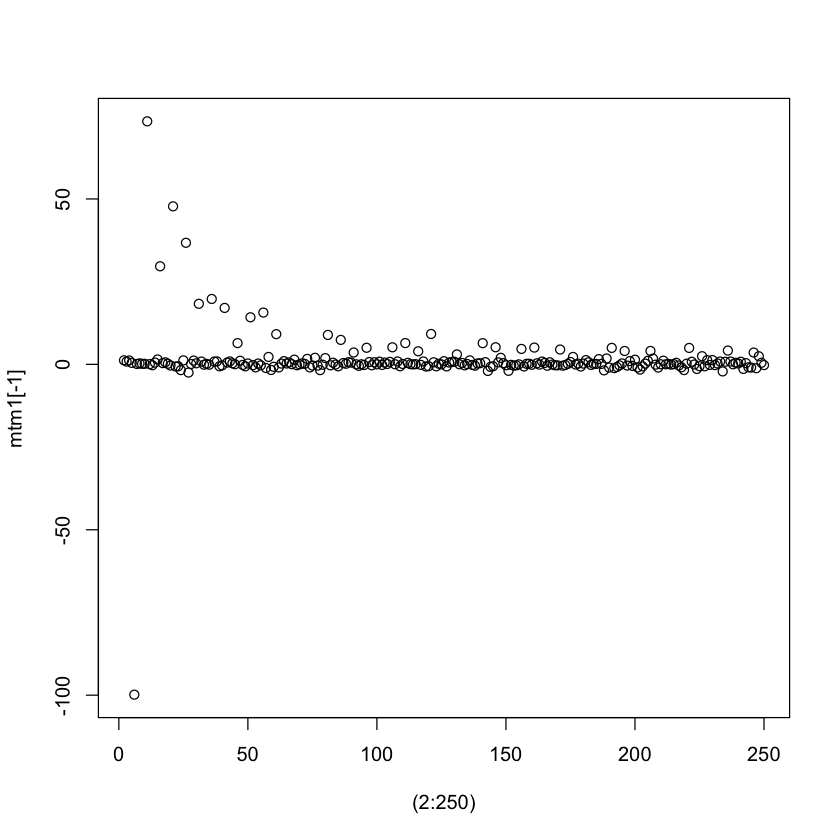

In [65]:
# 5 days rebalancing of buying high
# initialize variables
buyStocksDf = data.frame(day = 12,stock = "IBM",cash = 10000)
stocks = list()
shares = list()
totalCash  = 5000000
dayInterval = 5
mtmprev = 0
mtmcurr = 0
mtm1 = list()
mtm1Val = list()
# 5 days rebalancing of buying low
for (today in 1:NROW(Date)){
    if(today %% dayInterval == 1){
        #initial day
        if(today == 1){
            stocks = list('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
            splitCash = totalCash/5
            totalCash = 0
            for(x in stocks){
                buyStocksDf = data.frame(day = today ,stock = x,cash = splitCash)
                stockDf = buyStocks(buyStocksDf)
                totalCash = totalCash + stockDf$remainingCash
                shares = append(shares, stockDf$amount)
            }
}
        #rebalance
        else {
            #find the 5 stocks whose "Adj Close" prices dropped the most
            mostDropped = surgedMost(today,dayInterval)
            #sell all current holdings
            for(x in stocks){
                totalCash = totalCash + stockValue(x, today)
            }
            stocks = list()
            shares = list()
            #split your cash
            splitCash = totalCash/5
            #buy the max shares of stock
            stocks = mostDropped
            for(x in stocks){
                buyStocksDf = data.frame(day = today ,stock = x,cash = splitCash)

stockDf = buyStocks(buyStocksDf)
                totalCash = totalCash + stockDf$remainingCash
                shares = append(shares, stockDf$amount)
            }
}
    }
    mtmprev = mtmcurr
    #USD to JPY
    mtmcurr = mtmValue(today, totalCash, stocks, shares)
    mtm1Val = append(mtm1Val, mtmcurr)
    mtm1 = append(mtm1, percentChange(mtmprev,mtmcurr))
}
#total
plot((2:250),mtm1Val[-1])
#percent change
plot((2:250),mtm1[-1])
#function for high-tech index
highTech = function(){
    ht = universe
    htday = ht %>% select(1,3,5,7,9,11,13,15,17,19)
    return(rowMeans(htday))
}
myHighTechAvg = highTech()
myHighTechPercent = list()
for(x in 2:250){
    myHighTechPercent = append(myHighTechPercent, percentChange(x-1,x))
}
#High-Tech Stock Percentage Comparison
plot((2:250),myHighTechPercent)